In [11]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

# Sparsity

In [21]:
dir = '/cluster/home/kamara/Explain/csv/'

expe = "sparsity"


jsonpath = f'/cluster/home/kamara/Explain/config_{expe}.json'
ranges = get_param_ranges(jsonpath)

df_sparsity = pd.read_csv(os.path.join(dir, f'{expe}.csv'), index_col = 0)
res = df_sparsity.groupby(by=['dataset', 'sparsity', 'explainer_name']).mean()
res = res.reset_index()

In [22]:
def explainer_type(row):
    if row['explainer_name'] in ['gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa_node', 'ig_node'] :
      return('gradient')
    return('baseline')



df_sparsity['type'] = df_sparsity.apply(lambda row: explainer_type(row), axis=1)
df_sparsity["1-fidelity_acc-"] = 1- df_sparsity["fidelity_acc-"]
df_sparsity["1-fidelity_prob-"] = 1- df_sparsity["fidelity_prob-"]

In [23]:
df_sparsity = df_sparsity.reset_index()
df_sparsity

dataset  sparsity explainer_name  num_test_nodes  gpu  f1_score  recall  \
0      syn1     0.000       distance           100.0  1.0  0.005823   1.000   
1      syn1     0.000   gnnexplainer           100.0  1.0  0.470810   1.000   
2      syn1     0.000        ig_node           100.0  1.0  0.007333   0.920   
3      syn1     0.000      occlusion           100.0  1.0  0.005822   1.000   
4      syn1     0.000       pagerank           100.0  1.0  0.005825   1.000   
..      ...       ...            ...             ...  ...       ...     ...   
175    syn6     0.997       pagerank           100.0  1.0  0.901818   0.992   
176    syn6     0.997   pgmexplainer           100.0  1.0  0.463463   0.512   
177    syn6     0.997         random           100.0  1.0  0.001250   0.002   
178    syn6     0.997        sa_node           100.0  1.0  0.093160   0.112   
179    syn6     0.997      subgraphx           100.0  1.0  0.781056   0.752   

     precision       auc  fidelity_acc+  ...  fidelity_prob-  mask_sparsity  \
0     0.002920  0.998450           0.53  ...        0.000000       0.009175   
1     0.371259  0.968212           0.53  ...        0.000000       0.937606   
2     0.003703  0.519937           0.53  ...        0.238978       0.050822   
3     0.002920  0.040737           0.53  ...       -0.100171       0.000243   
4     0.002921  0.999891           0.53  ...        0.000000       0.000487   
..         ...       ...            ...  ...             ...            ...   
175   0.826667  0.945806           0.64  ...       -0.011860       0.997214   
176   0.423651  0.743368           0.55  ...        0.216077       0.997214   
177   0.000909  0.499104           0.00  ...        0.589573       0.997214   
178   0.080583  0.554874           0.01  ...        0.589573       0.997214   
179   0.823000 -1.000000           0.62  ...        0.050480       0.997697   

     expl_edges    time  number_of_edges  mask_sparsity_init  \
0       4072.29  0.0159           4110.0            0.009175   
1        256.44  2.5984           4110.0            0.937606   
2       3901.12  0.1673           4110.0            0.050822   
3       4109.00  0.5983           4110.0            0.000243   
4       4108.00  0.0210           4110.0            0.000487   
..          ...     ...              ...                 ...   
175       11.00  0.0205           3948.0            0.000507   
176       11.00  3.7949           3948.0            0.781282   
177       11.00  0.0001           3948.0            0.000253   
178       11.00  0.0031           3948.0            0.000750   
179        9.09  3.0245           3948.0            0.987725   

     non_zero_values_init         type  1-fidelity_acc- 1-fidelity_prob-  
0                 4072.29     baseline             1.00         1.000000  
1                  256.44  pertubation             1.00         1.000000  
2                 3901.12     gradient             0.76         0.761022  
3                 4109.00  pertubation             1.00         1.100171  
4                 4108.00     baseline             1.00         1.000000  
..                    ...          ...              ...              ...  
175               3946.00     baseline             0.99         1.011860  
176                863.50  pertubation             0.78         0.783923  
177               3947.00     baseline             0.36         0.410427  
178               3945.04     gradient             0.36         0.410427  
179                  8.98  pertubation             0.95         0.949520  

[180 rows x 22 columns]

In [37]:
df_init_spars = df_sparsity.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()
df_init_spars = df_init_spars.reset_index()
dfs = df_init_spars[df_init_spars.sparsity==0.99]
res_init = dfs[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-']]
res_init['charact'] = 2 * res_init['fidelity_prob+'] * (1-res_init['fidelity_prob-'])/ (res_init['fidelity_prob+']  + 1-res_init['fidelity_prob-'])

res_init.groupby(by=['dataset', 'explainer_name']).mean()

/cluster/apps/nss/gcc-6.3.0/python/3.7.4/x86_64/lib64/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


mask_sparsity_init  non_zero_values_init  \
dataset explainer_name                                             
syn1    distance                  0.009175               4072.29   
        gnnexplainer              0.937606                256.44   
        ig_node                   0.050822               3901.12   
        occlusion                 0.000243               4109.00   
        pagerank                  0.000487               4108.00   
        pgmexplainer              0.818229                747.08   
        random                    0.000243               4109.00   
        sa_node                   0.000487               4108.00   
        subgraphx                 0.947319                 11.02   
syn3    distance                  0.009295               5032.78   
        gnnexplainer              0.972154                141.46   
        ig_node                   0.000492               5077.50   
        occlusion                 0.068260               4733.24   
        pagerank                  0.000602               5076.94   
        pgmexplainer              0.924634                382.86   
        random                    0.000197               5079.00   
        sa_node                   0.000642               5076.74   
        subgraphx                 0.976874                 15.88   
syn4    distance                  0.004979               1926.36   
        gnnexplainer              0.989886                 19.58   
        ig_node                   0.357479               1243.92   
        occlusion                 0.001074               1933.92   
        pagerank                  0.001209               1933.66   
        pgmexplainer              0.985083                 28.88   
        random                    0.000517               1935.00   
        sa_node                   0.001353               1933.38   
        subgraphx                 0.995630                  8.46   
syn5    distance                  0.001220               3405.84   
        gnnexplainer              0.989724                 35.04   
        ig_node                   0.778094                756.70   
        occlusion                 0.002346               3402.00   
        pagerank                  0.000845               3407.12   
        pgmexplainer              0.983378                 56.68   
        random                    0.000293               3409.00   
        sa_node                   0.983378                 56.68   
        subgraphx                 0.996135                 13.18   
syn6    distance                  0.038845               3794.64   
        gnnexplainer              0.933511                262.50   
        ig_node                   0.003151               3935.56   
        occlusion                 0.000274               3946.92   
        pagerank                  0.000507               3946.00   
        pgmexplainer              0.779980                868.64   
        random                    0.000253               3947.00   
        sa_node                   0.000750               3945.04   
        subgraphx                 0.987720                  9.00   

                        number_of_edges    time  fidelity_prob+  \
dataset explainer_name                                            
syn1    distance                 4110.0  0.0139        0.487905   
        gnnexplainer             4110.0  2.5756        0.273415   
        ig_node                  4110.0  0.1677        0.054472   
        occlusion                4110.0  0.6709        0.196120   
        pagerank                 4110.0  0.0200        0.487905   
        pgmexplainer             4110.0  5.3987        0.378801   
        random                   4110.0  0.0001        0.009899   
        sa_node                  4110.0  0.0027        0.003149   
        subgraphx                4110.0  0.9899        0.409158   
syn3    distance                 5080.0  0.0212        0.018374   
        gnnexplainer   

In [38]:
mask_spars_init = pd.pivot_table(res_init, values='mask_sparsity_init', index=['explainer_name'], columns='dataset')
mask_spars_init['mean_sparsity'] = mask_spars_init.mean(axis=1)
mask_spars_init.sort_values(by=['mean_sparsity'])

dataset             syn1      syn3      syn4      syn5      syn6  \
explainer_name                                                     
random          0.000243  0.000197  0.000517  0.000293  0.000253   
pagerank        0.000487  0.000602  0.001209  0.000845  0.000507   
distance        0.009175  0.009295  0.004979  0.001220  0.038845   
occlusion       0.000243  0.068260  0.001074  0.002346  0.000274   
sa_node         0.000487  0.000642  0.001353  0.983378  0.000750   
ig_node         0.050822  0.000492  0.357479  0.778094  0.003151   
pgmexplainer    0.818229  0.924634  0.985083  0.983378  0.779980   
gnnexplainer    0.937606  0.972154  0.989886  0.989724  0.933511   
subgraphx       0.947319  0.976874  0.995630  0.996135  0.987720   

dataset         mean_sparsity  
explainer_name                 
random               0.000301  
pagerank             0.000730  
distance             0.012703  
occlusion            0.014439  
sa_node              0.197322  
ig_node              0.238008  
pgmexplainer         0.898261  
gnnexplainer         0.964576  
subgraphx            0.980736

In [39]:
df_time = pd.pivot_table(res_init, values='time', index=['explainer_name'], columns='dataset')
df_time['mean_time'] = df_time.mean(axis=1)
df_time.sort_values(by=['mean_time'])

dataset           syn1    syn3    syn4    syn5    syn6  mean_time
explainer_name                                                   
random          0.0001  0.0000  0.0000  0.0000  0.0000    0.00002
sa_node         0.0027  0.0055  0.0028  0.0047  0.0038    0.00390
distance        0.0139  0.0212  0.0091  0.0125  0.0159    0.01452
pagerank        0.0200  0.0258  0.0128  0.0198  0.0235    0.02038
ig_node         0.1677  0.2006  0.2786  0.1894  0.1597    0.19920
occlusion       0.6709  0.3619  0.0675  0.1385  0.5155    0.35086
subgraphx       0.9899  0.8435  0.2651  4.5897  2.9712    1.93188
gnnexplainer    2.5756  3.6295  2.5982  3.6556  2.6824    3.02826
pgmexplainer    5.3987  5.0842  6.9566  9.3030  5.6761    6.48372

In [40]:
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset             syn1      syn3      syn4      syn5      syn6  mean_charact
explainer_name                                                                
random          0.019423 -0.001513  0.022224  0.030380  0.001823      0.014467
sa_node         0.006258  0.000000  0.028747  0.808807  0.015806      0.171924
occlusion       0.289462 -0.000766  0.297435  0.217286  0.110089      0.182701
ig_node         0.099397 -0.001138  0.948240  0.779218 -0.015315      0.362081
subgraphx       0.567118  0.032681  0.097115  0.572178  0.722763      0.398371
gnnexplainer    0.401742  0.029800  0.869203  0.816496  0.512653      0.525979
distance        0.660091  0.036087  0.788064  0.748062  0.742081      0.594877
pgmexplainer    0.524149  0.031770  0.971458  0.861597  0.668965      0.611588
pagerank        0.657145  0.036086  0.963703  0.818803  0.729503      0.641048

In [28]:
df_f = pd.pivot_table(res_init, values='fidelity_prob+', index=['explainer_name'], columns='dataset')
df_f['mean_f+'] = df_f.mean(axis=1)
df_f.sort_values(by=['mean_f+'])

dataset             syn1      syn3      syn4      syn5      syn6   mean_f+
explainer_name                                                            
sa_node         0.003149  0.000000  0.196857  0.866700  0.011466  0.215634
occlusion       0.196120 -0.002297  0.979212  0.610713  0.062125  0.369175
ig_node         0.054472 -0.000996  0.984495  0.866700 -0.008630  0.379208
random          0.154786 -0.003277  0.771867  0.733792  0.289888  0.389411
subgraphx       0.408513  0.016611  0.984495  0.867514  0.579177  0.571262
gnnexplainer    0.485594  0.018374  0.984495  0.866700  0.571462  0.585325
distance        0.487905  0.018374  0.984495  0.866700  0.589573  0.589409
pagerank        0.487905  0.018374  0.984495  0.866700  0.589573  0.589409
pgmexplainer    0.487905  0.018374  0.984495  0.866700  0.589573  0.589409

In [29]:
df_finv = pd.pivot_table(res_init, values='fidelity_prob-', index=['explainer_name'], columns='dataset')
df_finv['mean_f-'] = df_finv.mean(axis=1)
df_finv.sort_values(by=['mean_f-'])

dataset             syn1      syn3      syn4      syn5      syn6   mean_f-
explainer_name                                                            
pgmexplainer   -0.003397 -0.000638  0.000000  0.000000 -0.000388 -0.000885
pagerank       -0.000338  0.000000  0.000000  0.000000  0.000026 -0.000062
distance       -0.003071 -0.000342  0.000000  0.000000  0.005222  0.000362
gnnexplainer    0.022846 -0.000113  0.000000  0.000000  0.014036  0.007354
ig_node         0.433433  0.018374  0.029287  0.028716  0.603596  0.222681
subgraphx       0.075652 -0.003695  0.949785  0.570031  0.042933  0.326941
sa_node         0.493760  0.018374  0.984494  0.000000  0.589573  0.417240
random          0.346690  0.005199  0.980430  0.869163  0.387522  0.517801
occlusion       0.447654  0.014901  0.824509  0.867848  0.517062  0.534395

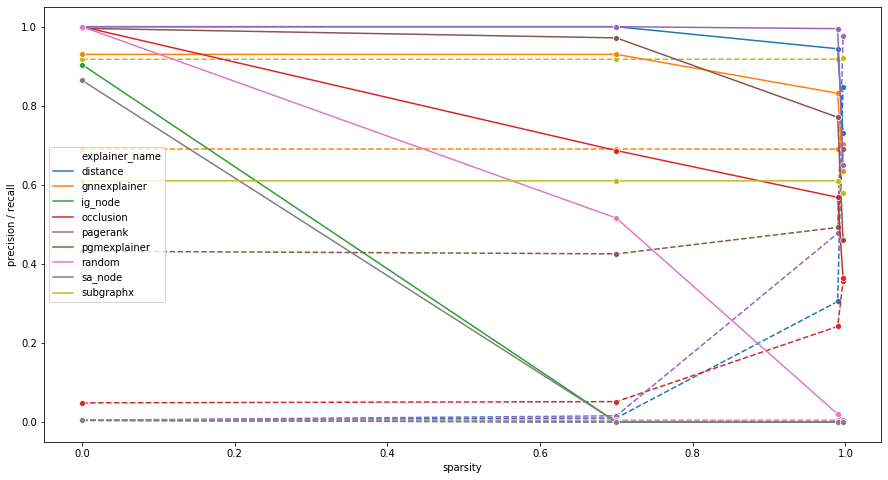

In [5]:
# Create a visualization


fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_sparsity[df_sparsity.dataset=="syn3"],
    x="sparsity", y="precision",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_sparsity[df_sparsity.dataset=="syn3"],
    x="sparsity", y="recall",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('precision / recall')
plt.show()


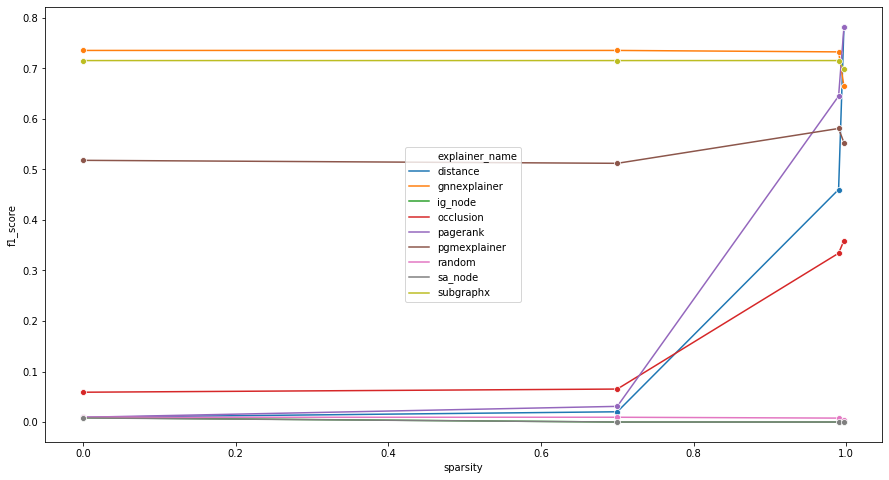

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(
    data=df_sparsity[df_sparsity.dataset=="syn3"],
    x="sparsity", y="f1_score", 
    hue="explainer_name", marker="o", ax=ax)


In [13]:
ranges['dataset']

['syn1', 'syn3', 'syn4', 'syn5', 'syn6']

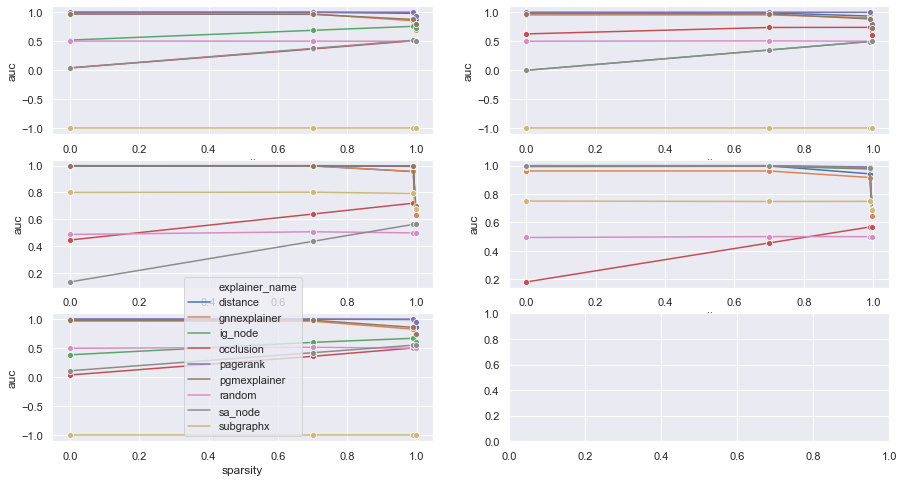

In [15]:
sns.set()
fig, axs = plt.subplots(3, 2, figsize=(15,8))
for i in range(5):
    sns.lineplot(
        data=df_sparsity[df_sparsity.dataset==ranges['dataset'][i]],
        x="sparsity", y="auc", 
        hue="explainer_name", marker="o", ax=axs[i//2, i%2])
    if i!=4:
        axs[i//2, i%2].get_legend().remove()


In [52]:
df_sparsity_small = df_sparsity[df_sparsity['dataset'].isin(['syn1', 'syn5'])]
df_sparsity_small

index dataset  sparsity explainer_name  num_test_nodes  gpu  f1_score  \
0        0    syn1     0.000       distance           100.0  1.0  0.005823   
1        1    syn1     0.000   gnnexplainer           100.0  1.0  0.470810   
2        2    syn1     0.000        ig_node           100.0  1.0  0.007333   
3        3    syn1     0.000      occlusion           100.0  1.0  0.005822   
4        4    syn1     0.000       pagerank           100.0  1.0  0.005825   
..     ...     ...       ...            ...             ...  ...       ...   
139    139    syn5     0.997       pagerank           100.0  1.0  0.552941   
140    140    syn5     0.997   pgmexplainer           100.0  1.0  0.541176   
141    141    syn5     0.997         random           100.0  1.0  0.005455   
142    142    syn5     0.997        sa_node           100.0  1.0  0.562549   
143    143    syn5     0.997      subgraphx           100.0  1.0  0.590981   

       recall  precision       auc  ...  fidelity_prob-  mask_sparsity  \
0    1.000000   0.002920  0.998450  ...        0.000000       0.009175   
1    1.000000   0.371259  0.968212  ...        0.000000       0.937606   
2    0.920000   0.003703  0.519937  ...        0.238978       0.050822   
3    1.000000   0.002920  0.040737  ...       -0.100171       0.000243   
4    1.000000   0.002921  0.999891  ...        0.000000       0.000487   
..        ...        ...       ...  ...             ...            ...   
139  0.393333   0.932000  0.693659  ...        0.818558       0.997068   
140  0.383333   0.920000  0.691551  ...        0.753033       0.997068   
141  0.005000   0.006000  0.499783  ...        0.866700       0.997068   
142  0.401667   0.941000  0.695966  ...        0.787651       0.997068   
143  0.444167   0.897286  0.687568  ...        0.791763       0.997079   

     expl_edges     time  number_of_edges  mask_sparsity_init  \
0       4072.29   0.0159           4110.0            0.009175   
1        256.44   2.5984           4110.0            0.937606   
2       3901.12   0.1673           4110.0            0.050822   
3       4109.00   0.5983           4110.0            0.000243   
4       4108.00   0.0210           4110.0            0.000487   
..          ...      ...              ...                 ...   
139       10.00   0.0201           3410.0            0.000845   
140       10.00  10.6972           3410.0            0.983378   
141       10.00   0.0000           3410.0            0.000293   
142       10.00   0.0039           3410.0            0.983378   
143        9.96   3.2824           3410.0            0.996106   

     non_zero_values_init         type  1-fidelity_acc-  1-fidelity_prob-  
0                 4072.29     baseline             1.00          1.000000  
1                  256.44  pertubation             1.00          1.000000  
2                 3901.12     gradient             0.76          0.761022  
3                 4109.00  pertubation             1.00          1.100171  
4                 4108.00     baseline             1.00          1.000000  
..                    ...          ...              ...               ...  
139               3407.12     baseline             0.01          0.181442  
140                 56.68  pertubation             0.06          0.246967  
141               3409.00     baseline             0.00          0.133300  
142                 56.68     gradient             0.04          0.212349  
143                 13.28  pertubation             0.02          0.208237  

[72 rows x 23 columns]

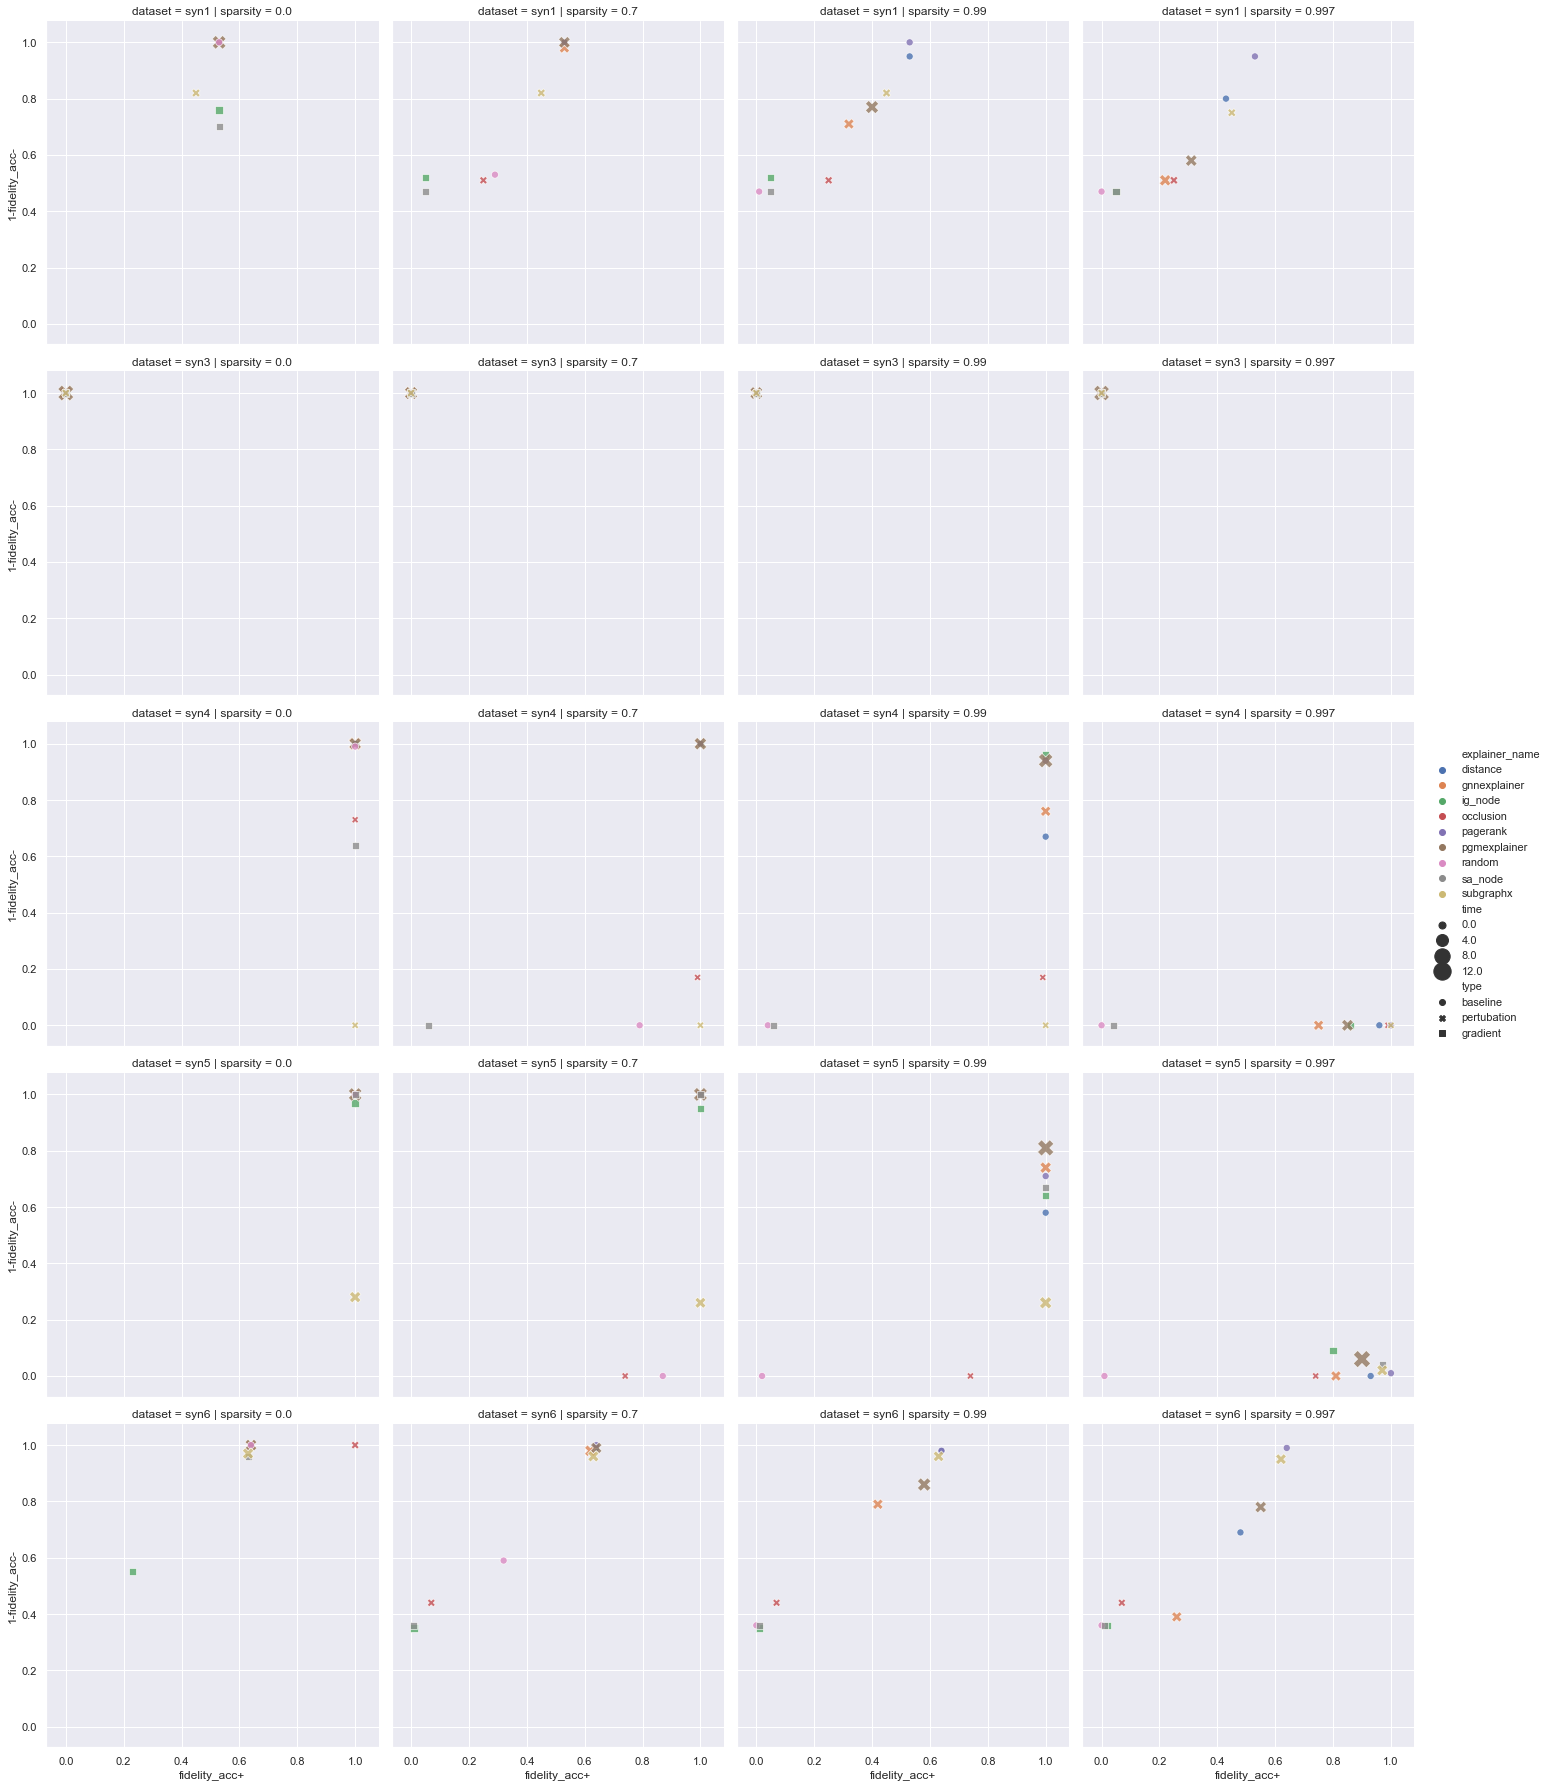

In [56]:
sns.set()

sns.relplot(
        data=df_sparsity,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .8
    )


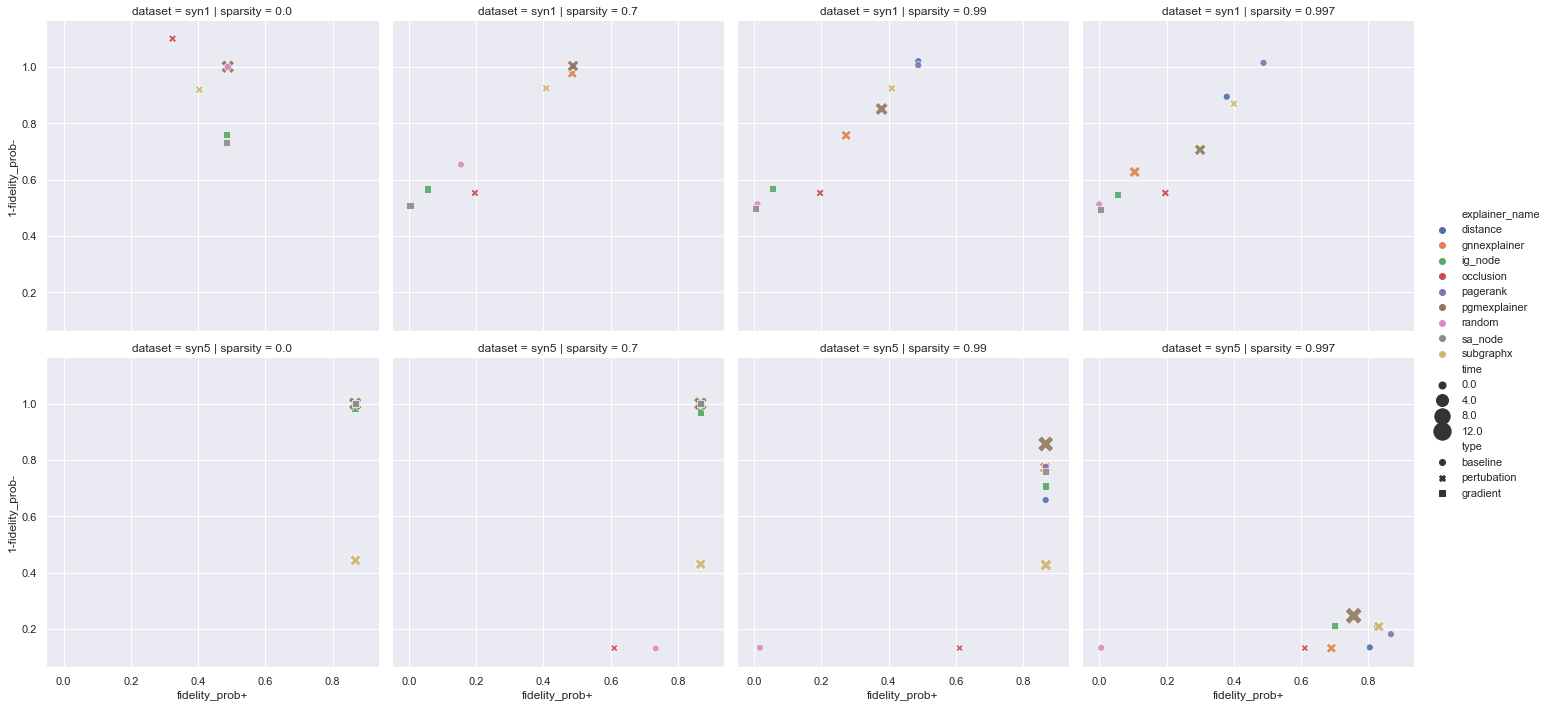

In [55]:
sns.relplot(
        data=df_sparsity_small,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .9
    )

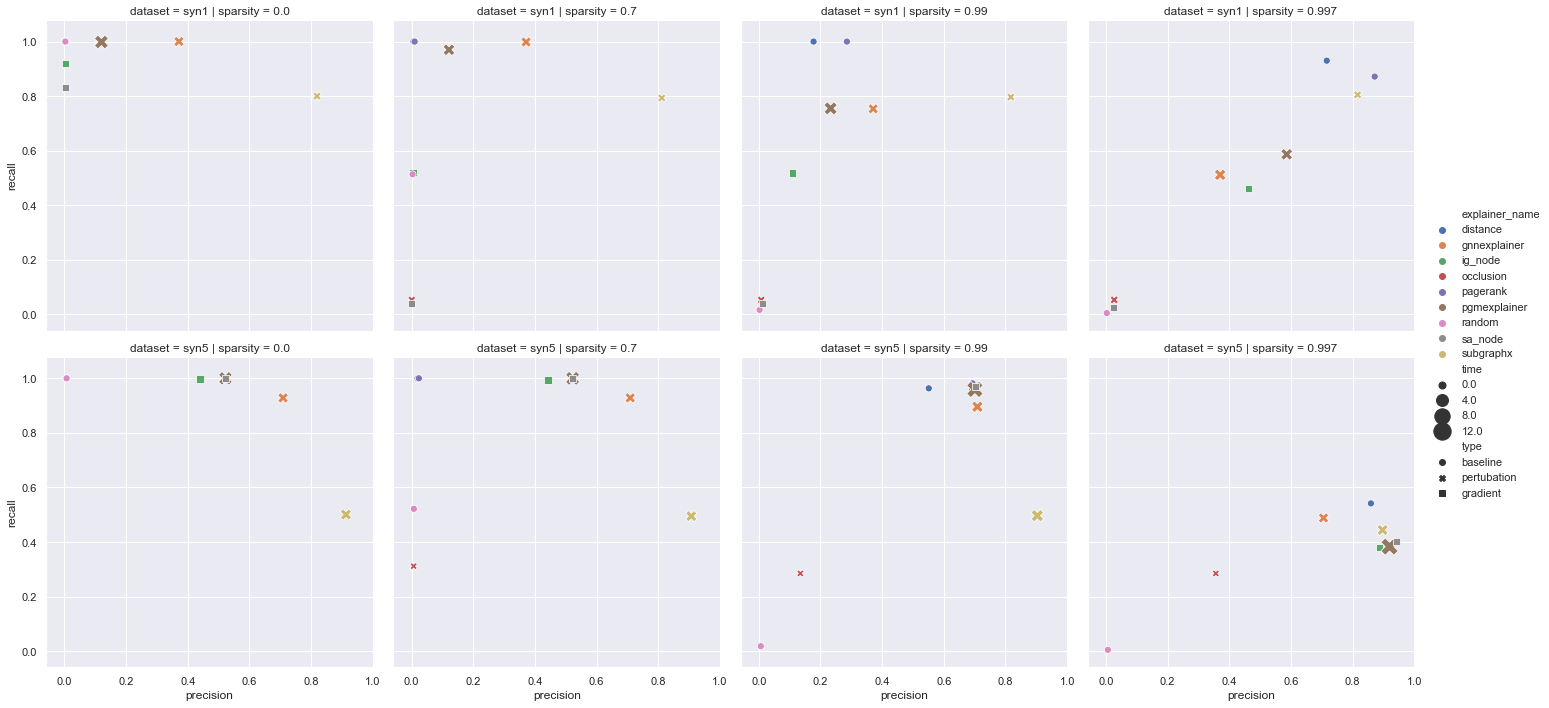

In [58]:
sns.relplot(
        data=df_sparsity_small,
        x="precision", y="recall", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type"
    )

# Threshold

In [66]:
dir = '/cluster/home/kamara/Explain/csv/'

expe = "threshold"


jsonpath = f'/cluster/home/kamara/Explain/config_{expe}.json'
ranges = get_param_ranges(jsonpath)

df = pd.read_csv(os.path.join(dir, f'{expe}.csv'), index_col = 0)
#res = df.groupby(by=['dataset', 'threshold', 'explainer_name']).mean()
#res.reset_index()
#df = df.reset_index()
#df = df[df.dataset=="syn1"]
res = df.groupby(by=['dataset', 'explainer_name', 'threshold']).mean()
res.reset_index()

dataset explainer_name  threshold  num_test_nodes  gpu  f1_score  \
0      syn1       distance        0.5           100.0  1.0  0.563576   
1      syn1       distance        0.8           100.0  1.0  0.563576   
2      syn1       distance        0.9           100.0  1.0  0.563576   
3      syn1   gnnexplainer        0.5           100.0  1.0  0.365325   
4      syn1   gnnexplainer        0.8           100.0  1.0  0.396900   
..      ...            ...        ...             ...  ...       ...   
130    syn6        sa_node        0.8           100.0  1.0  0.114324   
131    syn6        sa_node        0.9           100.0  1.0  0.180224   
132    syn6      subgraphx        0.5           100.0  1.0  0.770111   
133    syn6      subgraphx        0.8           100.0  1.0  0.782778   
134    syn6      subgraphx        0.9           100.0  1.0  0.773444   

       recall  precision       auc  fidelity_acc+  fidelity_acc-  \
0    0.413333   0.939500  0.603303           0.05           0.53   
1    0.413333   0.939500  0.603303           0.05           0.53   
2    0.413333   0.939500  0.603303           0.05           0.53   
3    0.650000   0.355707  0.720080           0.44           0.29   
4    0.683333   0.392814  0.727922           0.44           0.31   
..        ...        ...       ...            ...            ...   
130  0.112000   0.246149  0.331125           0.01           0.64   
131  0.112000   0.532635  0.336103           0.01           0.64   
132  0.740000   0.814000  0.869815           0.62           0.04   
133  0.752000   0.827500  0.875820           0.63           0.03   
134  0.744000   0.811500  0.871812           0.62           0.05   

     fidelity_prob+  fidelity_prob-  mask_sparsity  expl_edges    time  \
0         -0.123116        0.487905       0.999336        2.73  0.0162   
1         -0.123116        0.487905       0.999336        2.73  0.0139   
2         -0.123116        0.487905       0.999336        2.73  0.0163   
3          0.285291        0.151176       0.941944      238.61  2.6174   
4          0.300469        0.173215       0.942144      237.79  4.7447   
..              ...             ...            ...         ...     ...   
130       -0.010230        0.589573       0.548607     1782.10  0.0029   
131       -0.014498        0.589573       0.560998     1733.18  0.0027   
132        0.570269        0.045479       0.997756        8.86  3.0914   
133        0.580068        0.035429       0.997735        8.94  3.3878   
134        0.567656        0.052988       0.997741        8.92  3.1119   

     number_of_edges  mask_sparsity_init  non_zero_values_init  
0             4110.0            0.009175               4072.29  
1             4110.0            0.009175               4072.29  
2             4110.0            0.009175               4072.29  
3             4110.0            0.937606                256.44  
4             4110.0            0.937606                256.44  
..               ...                 ...                   ...  
130           3948.0            0.000750               3945.04  
131           3948.0            0.000750               3945.04  
132           3948.0            0.977756                  8.86  
133           3948.0            0.987736                  8.94  
134           3948.0            0.977741                  8.92  

[135 rows x 19 columns]

In [67]:
def explainer_type(row):
    if row['explainer_name'] in ['gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa_node', 'ig_node'] :
      return('gradient')
    return('baseline')



df['type'] = df.apply(lambda row: explainer_type(row), axis=1)
df["1-fidelity_acc-"] = 1- df["fidelity_acc-"]
df["1-fidelity_prob-"] = 1- df["fidelity_prob-"]

In [68]:
df = df.reset_index()
df

dataset  threshold explainer_name  num_test_nodes  gpu  f1_score  \
0      syn1        0.5       distance           100.0  1.0  0.563576   
1      syn1        0.5   gnnexplainer           100.0  1.0  0.365325   
2      syn1        0.5        ig_node           100.0  1.0  0.446275   
3      syn1        0.5      occlusion           100.0  1.0  0.001630   
4      syn1        0.5       pagerank           100.0  1.0  0.880128   
..      ...        ...            ...             ...  ...       ...   
130    syn6        0.9       pagerank           100.0  1.0  0.423048   
131    syn6        0.9   pgmexplainer           100.0  1.0  0.380048   
132    syn6        0.9         random           100.0  1.0  0.005078   
133    syn6        0.9        sa_node           100.0  1.0  0.180224   
134    syn6        0.9      subgraphx           100.0  1.0  0.773444   

       recall  precision       auc  fidelity_acc+  ...  fidelity_prob-  \
0    0.413333   0.939500  0.603303           0.05  ...        0.487905   
1    0.650000   0.355707  0.720080           0.44  ...        0.151176   
2    0.436667   0.459524  0.478424           0.05  ...        0.445705   
3    0.240000   0.000818  0.062967           0.48  ...        0.009594   
4    0.861667   0.903381  0.930774           0.53  ...       -0.018173   
..        ...        ...       ...            ...  ...             ...   
130  0.314000   0.957333  0.656954           0.63  ...        0.326768   
131  0.376000   0.560708  0.687330           0.57  ...        0.253975   
132  0.194000   0.002573  0.500879           0.07  ...        0.577516   
133  0.112000   0.532635  0.336103           0.01  ...        0.589573   
134  0.744000   0.811500  0.871812           0.62  ...        0.052988   

     mask_sparsity  expl_edges    time  number_of_edges  mask_sparsity_init  \
0         0.999336        2.73  0.0162           4110.0            0.009175   
1         0.941944      238.61  2.6174           4110.0            0.937606   
2         0.520219     1971.90  0.1674           4110.0            0.050822   
3         0.062044     3855.00  0.7179           4110.0            0.000243   
4         0.997202       11.50  0.0198           4110.0            0.000487   
..             ...         ...     ...              ...                 ...   
130       0.999103        3.54  0.0209           3948.0            0.000507   
131       0.997219       10.98  3.8762           3948.0            0.780314   
132       0.899491      396.81  0.0000           3948.0            0.000253   
133       0.560998     1733.18  0.0027           3948.0            0.000750   
134       0.997741        8.92  3.1119           3948.0            0.977741   

     non_zero_values_init         type  1-fidelity_acc- 1-fidelity_prob-  
0                 4072.29     baseline             0.47         0.512095  
1                  256.44  pertubation             0.71         0.848824  
2                 3901.12     gradient             0.47         0.554295  
3                 4109.00  pertubation             0.95         0.990406  
4                 4108.00     baseline             0.95         1.018173  
..                    ...          ...              ...              ...  
130               3946.00     baseline             0.64         0.673232  
131                867.32  pertubation             0.77         0.746025  
132               3947.00     baseline             0.37         0.422484  
133               3945.04     gradient             0.36         0.410427  
134                  8.92  pertubation             0.95         0.947012  

[135 rows x 22 columns]

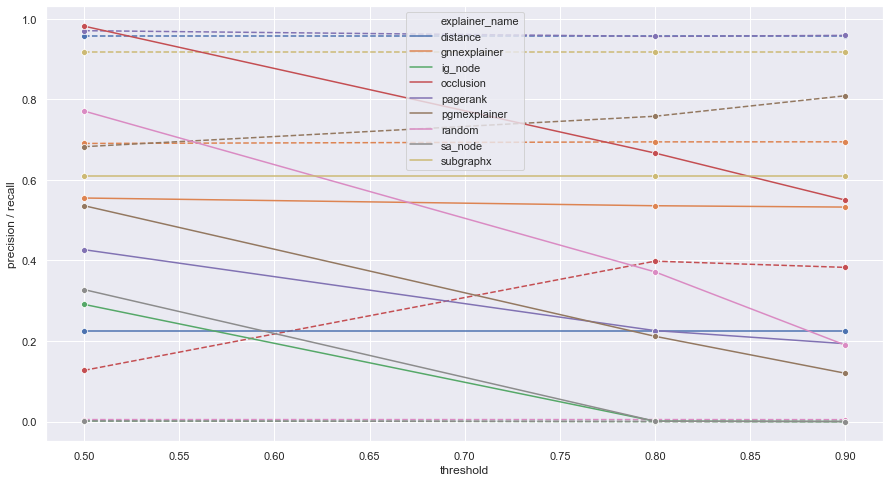

In [13]:
# Create a visualization


fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df[df.dataset=="syn3"],
    x="threshold", y="precision",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df[df.dataset=="syn3"],
    x="threshold", y="recall",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('precision / recall')
plt.show()


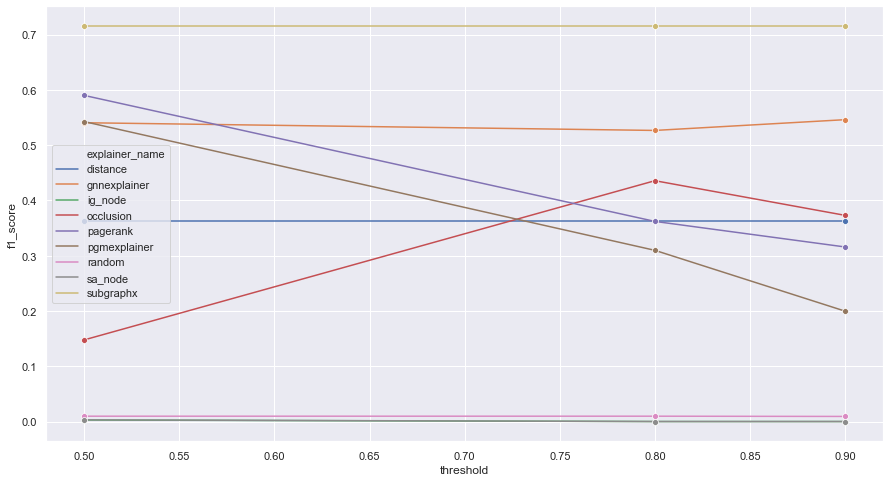

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(
    data=df[df.dataset=="syn3"],
    x="threshold", y="f1_score", 
    hue="explainer_name", marker="o", ax=ax)


In [69]:
df_small = df[df['dataset'].isin(['syn1', 'syn5'])]
df_small

dataset  threshold explainer_name  num_test_nodes  gpu  f1_score  \
0      syn1        0.5       distance           100.0  1.0  0.563576   
1      syn1        0.5   gnnexplainer           100.0  1.0  0.365325   
2      syn1        0.5        ig_node           100.0  1.0  0.446275   
3      syn1        0.5      occlusion           100.0  1.0  0.001630   
4      syn1        0.5       pagerank           100.0  1.0  0.880128   
5      syn1        0.5   pgmexplainer           100.0  1.0  0.501004   
6      syn1        0.5         random           100.0  1.0  0.005979   
7      syn1        0.5        sa_node           100.0  1.0  0.028457   
8      syn1        0.5      subgraphx           100.0  1.0  0.807160   
9      syn1        0.8       distance           100.0  1.0  0.563576   
10     syn1        0.8   gnnexplainer           100.0  1.0  0.396900   
11     syn1        0.8        ig_node           100.0  1.0  0.339048   
12     syn1        0.8      occlusion           100.0  1.0  0.007459   
13     syn1        0.8       pagerank           100.0  1.0  0.571909   
14     syn1        0.8   pgmexplainer           100.0  1.0  0.522865   
15     syn1        0.8         random           100.0  1.0  0.006058   
16     syn1        0.8        sa_node           100.0  1.0  0.014393   
17     syn1        0.8      subgraphx           100.0  1.0  0.788960   
18     syn1        0.9       distance           100.0  1.0  0.563576   
19     syn1        0.9   gnnexplainer           100.0  1.0  0.358370   
20     syn1        0.9        ig_node           100.0  1.0  0.157143   
21     syn1        0.9      occlusion           100.0  1.0  0.013983   
22     syn1        0.9       pagerank           100.0  1.0  0.491190   
23     syn1        0.9   pgmexplainer           100.0  1.0  0.471866   
24     syn1        0.9         random           100.0  1.0  0.005707   
25     syn1        0.9        sa_node           100.0  1.0  0.014286   
26     syn1        0.9      subgraphx           100.0  1.0  0.798312   
81     syn5        0.5       distance           100.0  1.0  0.358749   
82     syn5        0.5   gnnexplainer           100.0  1.0  0.558295   
83     syn5        0.5        ig_node           100.0  1.0  0.781497   
84     syn5        0.5      occlusion           100.0  1.0  0.317872   
85     syn5        0.5       pagerank           100.0  1.0  0.538479   
86     syn5        0.5   pgmexplainer           100.0  1.0  0.792880   
87     syn5        0.5         random           100.0  1.0  0.013988   
88     syn5        0.5        sa_node           100.0  1.0  0.738765   
89     syn5        0.5      subgraphx           100.0  1.0  0.624797   
90     syn5        0.8       distance           100.0  1.0  0.358749   
91     syn5        0.8   gnnexplainer           100.0  1.0  0.560953   
92     syn5        0.8        ig_node           100.0  1.0  0.443217   
93     syn5        0.8      occlusion           100.0  1.0  0.328294   
94     syn5        0.8       pagerank           100.0  1.0  0.358749   
95     syn5        0.8   pgmexplainer           100.0  1.0  0.830996   
96     syn5        0.8         random           100.0  1.0  0.014498   
97     syn5        0.8        sa_node           100.0  1.0  0.507126   
98     syn5        0.8      subgraphx           100.0  1.0  0.622009   
99     syn5        0.9       distance           100.0  1.0  0.358749   
100    syn5        0.9   gnnexplainer           100.0  1.0  0.574700   
101    syn5        0.9        ig_node           100.0  1.0  0.273165   
102    syn5        0.9      occlusion           100.0  1.0  0.300097   
103    syn5        0.9       pagerank           100.0  1.0  0.338442   
104    syn5        0.9   pgmexplainer           100.0  1.0  0.851155   
105    syn5        0.9         random           100.0  1.0  0.012194   
106    syn5        0.9        sa_node           100.0  1.0  0.374597   
107    syn5        0.9      subgraphx           100.0  1.0  0.629564   

       recall  precision       auc  fidelit

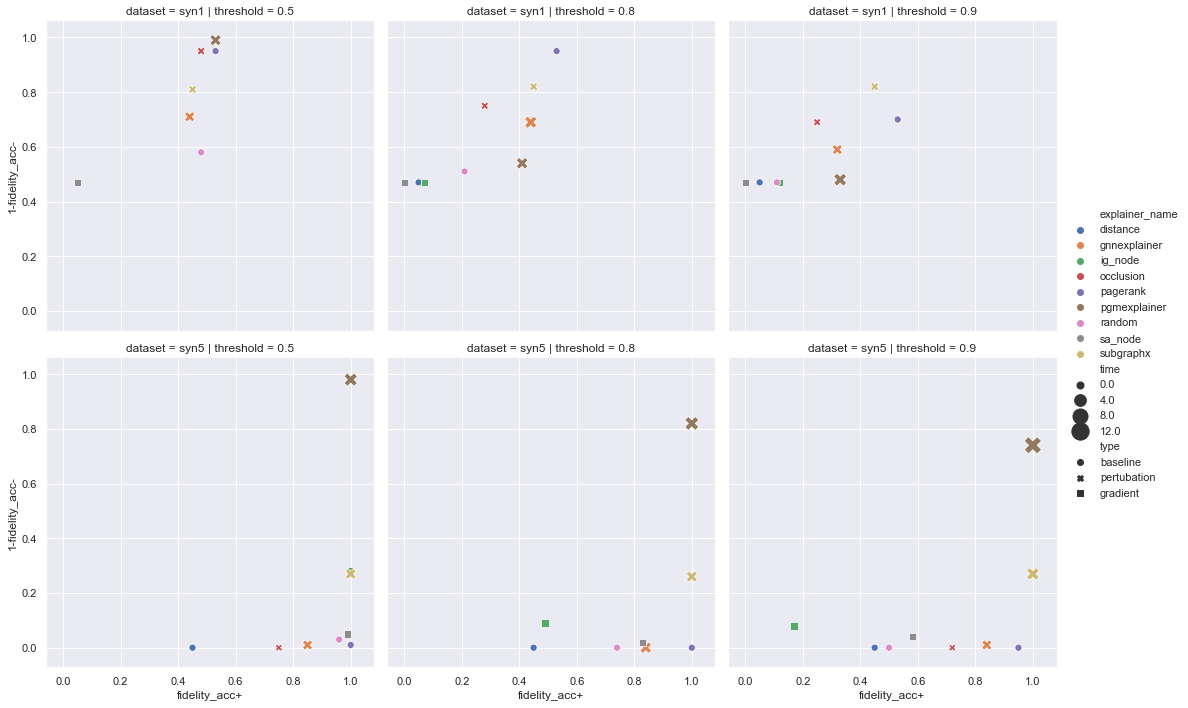

In [70]:
sns.set()

sns.relplot(
        data=df_small,
        x="fidelity_acc+", y="1-fidelity_acc-", col="threshold", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type"
    )


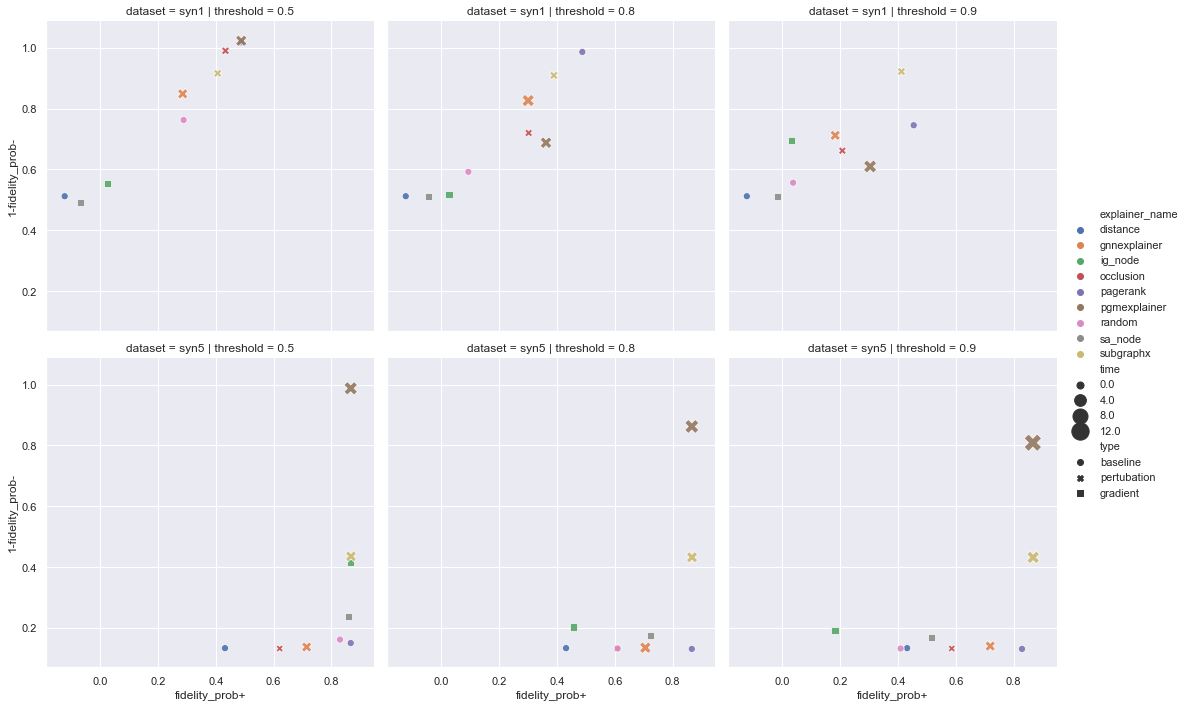

In [71]:
sns.relplot(
        data=df_small,
        x="fidelity_prob+", y="1-fidelity_prob-", col="threshold", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .9
    )

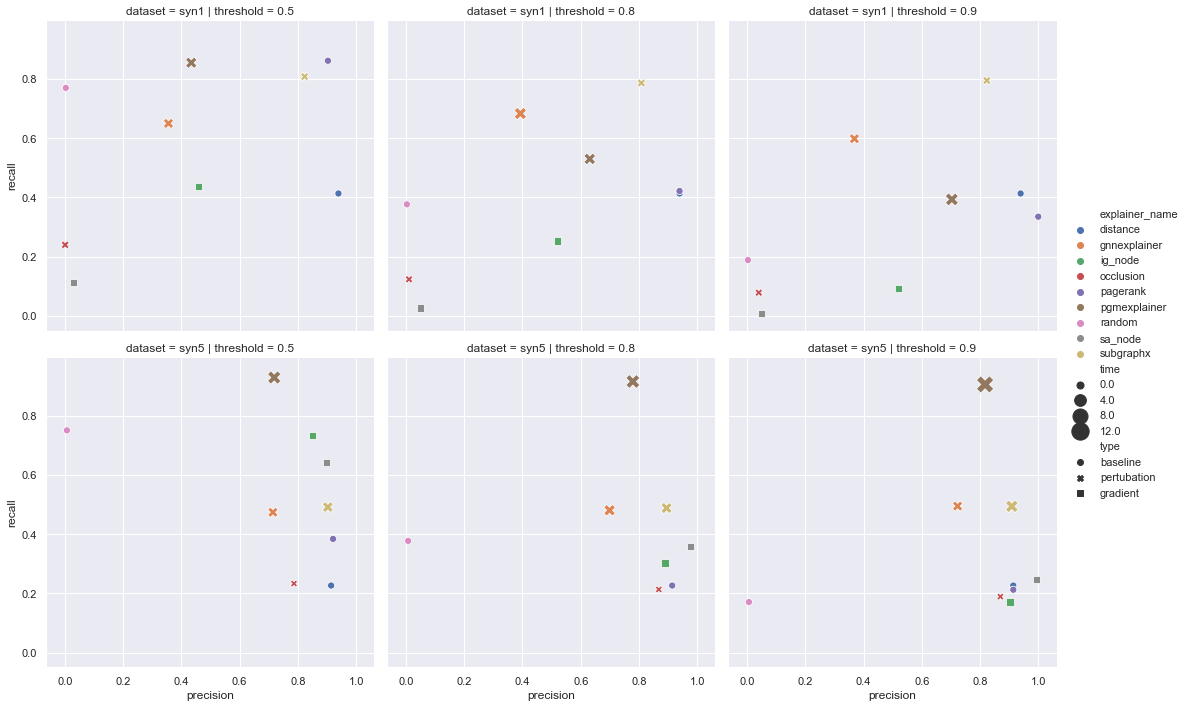

In [72]:
sns.relplot(
        data=df_small,
        x="precision", y="recall", col="threshold", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type"
    )

# Topk

In [73]:
dir = '/cluster/home/kamara/Explain/csv/'

expe = "topk"


jsonpath = f'/cluster/home/kamara/Explain/config_{expe}.json'
ranges = get_param_ranges(jsonpath)

df = pd.read_csv(os.path.join(dir, f'{expe}.csv'), index_col = 0)
#res = df.groupby(by=['dataset', 'threshold', 'explainer_name']).mean()
#res.reset_index()
#df = df.reset_index()
#df = df[df.dataset=="syn1"]
res = df.groupby(by=['dataset', 'explainer_name', 'topk']).mean()
res.reset_index()

dataset explainer_name  topk  num_test_nodes  gpu  f1_score    recall  \
0      syn1       distance    10           100.0  1.0  0.827099  0.895000   
1      syn1       distance    20           100.0  1.0  0.598033  0.988333   
2      syn1       distance    40           100.0  1.0  0.308923  1.000000   
3      syn1       distance   100           100.0  1.0  0.127024  1.000000   
4      syn1       distance   500           100.0  1.0  0.026476  1.000000   
..      ...            ...   ...             ...  ...       ...       ...   
220    syn6      subgraphx    10           100.0  1.0  0.773000  0.744000   
221    syn6      subgraphx    20           100.0  1.0  0.764556  0.734000   
222    syn6      subgraphx    40           100.0  1.0  0.768111  0.738000   
223    syn6      subgraphx   100           100.0  1.0  0.784778  0.754000   
224    syn6      subgraphx   500           100.0  1.0  0.765222  0.732000   

     precision       auc  fidelity_acc+  fidelity_acc-  fidelity_prob+  \
0     0.777849  0.838573           0.38           0.33        0.327711   
1     0.429664  0.961615           0.51           0.07        0.471140   
2     0.182739  0.980144           0.53           0.05        0.487905   
3     0.067827  0.990226           0.53           0.01        0.487905   
4     0.013416  0.998450           0.53           0.00        0.487905   
..         ...       ...            ...            ...             ...   
220   0.810500 -1.000000           0.63           0.02        0.580567   
221   0.809000 -1.000000           0.63           0.03        0.580177   
222   0.807000 -1.000000           0.63           0.04        0.577465   
223   0.824500 -1.000000           0.63           0.03        0.579735   
224   0.813000 -1.000000           0.63           0.04        0.573782   

     fidelity_prob-  mask_sparsity  expl_edges    time  number_of_edges  \
0          0.226022       0.997567       10.00  0.0162           4110.0   
1         -0.002833       0.995134       20.00  0.0163           4110.0   
2         -0.020141       0.990268       40.00  0.0136           4110.0   
3         -0.015155       0.975669      100.00  0.0140           4110.0   
4         -0.006607       0.878345      500.00  0.0186           4110.0   
..              ...            ...         ...     ...              ...   
220        0.025418       0.997685        9.14  3.2561           3948.0   
221        0.034979       0.997685        9.14  3.3019           3948.0   
222        0.043080       0.997619        9.40  4.2650           3948.0   
223        0.033479       0.997467       10.00  4.1106           3948.0   
224        0.044031       0.996484       13.88  3.9086           3948.0   

     mask_sparsity_init  non_zero_values_init  
0              0.009175               4072.29  
1              0.009175               4072.29  
2              0.009175               4072.29  
3              0.009175               4072.29  
4              0.009175               4072.29  
..                  ...                   ...  
220            0.987710                  9.04  
221            0.987736                  8.94  
222            0.987720                  9.00  
223            0.987720                  9.00  
224            0.987751                  8.88  

[225 rows x 19 columns]

In [74]:
def explainer_type(row):
    if row['explainer_name'] in ['gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa_node', 'ig_node'] :
      return('gradient')
    return('baseline')



df['type'] = df.apply(lambda row: explainer_type(row), axis=1)
df["1-fidelity_acc-"] = 1- df["fidelity_acc-"]
df["1-fidelity_prob-"] = 1- df["fidelity_prob-"]

In [75]:
df = df.reset_index()
df

dataset  topk explainer_name  num_test_nodes  gpu  f1_score    recall  \
0      syn1    10       distance           100.0  1.0  0.827099  0.895000   
1      syn1    10   gnnexplainer           100.0  1.0  0.393343  0.440000   
2      syn1    10        ig_node           100.0  1.0  0.415758  0.381667   
3      syn1    10      occlusion           100.0  1.0  0.040000  0.053333   
4      syn1    10       pagerank           100.0  1.0  0.863636  0.791667   
..      ...   ...            ...             ...  ...       ...       ...   
220    syn6   500       pagerank           100.0  1.0  0.039216  1.000000   
221    syn6   500   pgmexplainer           100.0  1.0  0.056839  0.978000   
222    syn6   500         random           100.0  1.0  0.005317  0.252000   
223    syn6   500        sa_node           100.0  1.0  0.003187  0.112000   
224    syn6   500      subgraphx           100.0  1.0  0.765222  0.732000   

     precision       auc  fidelity_acc+  ...  fidelity_prob-  mask_sparsity  \
0     0.777849  0.838573           0.38  ...        0.226022       0.997567   
1     0.360433  0.650486           0.21  ...        0.415991       0.997567   
2     0.456667  0.690219           0.05  ...        0.435937       0.997567   
3     0.032000  0.512180           0.25  ...        0.447654       0.997567   
4     0.950000  0.895794           0.53  ...       -0.005111       0.997567   
..         ...       ...            ...  ...             ...            ...   
220   0.020000  0.999761           0.64  ...        0.002842       0.873354   
221   0.029418  0.976755           0.64  ...        0.008439       0.903652   
222   0.002687  0.505638           0.06  ...        0.568873       0.873354   
223   0.001619  0.499740           0.01  ...        0.589573       0.873354   
224   0.813000 -1.000000           0.63  ...        0.044031       0.996484   

     expl_edges    time  number_of_edges  mask_sparsity_init  \
0         10.00  0.0162           4110.0            0.009175   
1         10.00  5.4596           4110.0            0.937606   
2         10.00  0.1592           4110.0            0.050822   
3         10.00  0.5690           4110.0            0.000243   
4         10.00  0.0200           4110.0            0.000487   
..          ...     ...              ...                 ...   
220      500.00  0.0275           3948.0            0.000507   
221      380.38  5.5268           3948.0            0.780294   
222      500.00  0.0000           3948.0            0.000253   
223      500.00  0.0034           3948.0            0.000750   
224       13.88  3.9086           3948.0            0.987751   

     non_zero_values_init         type  1-fidelity_acc- 1-fidelity_prob-  
0                 4072.29     baseline             0.67         0.773978  
1                  256.44  pertubation             0.48         0.584009  
2                 3901.12     gradient             0.47         0.564063  
3                 4109.00  pertubation             0.51         0.552346  
4                 4108.00     baseline             0.95         1.005111  
..                    ...          ...              ...              ...  
220               3946.00     baseline             0.99         0.997158  
221                867.40  pertubation             0.98         0.991561  
222               3947.00     baseline             0.40         0.431127  
223               3945.04     gradient             0.36         0.410427  
224                  8.88  pertubation             0.96         0.955969  

[225 rows x 22 columns]

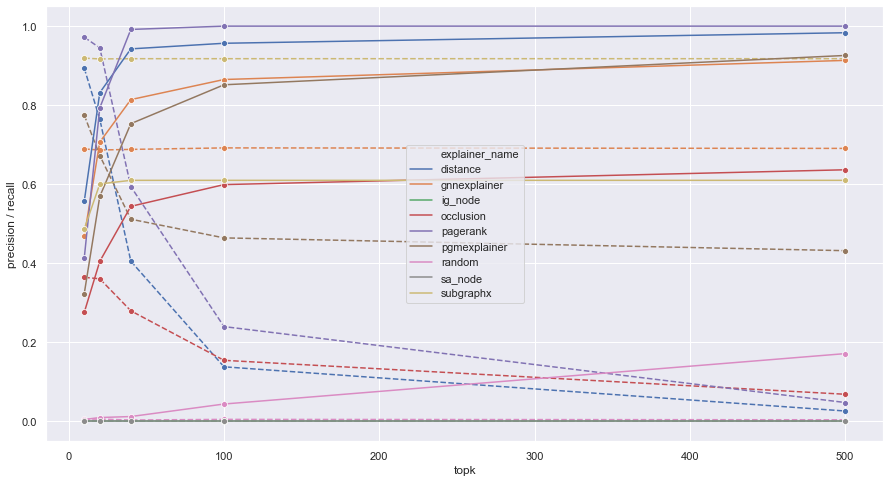

In [42]:
# Create a visualization


fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df[df.dataset=="syn3"],
    x="topk", y="precision",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df[df.dataset=="syn3"],
    x="topk", y="recall",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('precision / recall')
plt.show()


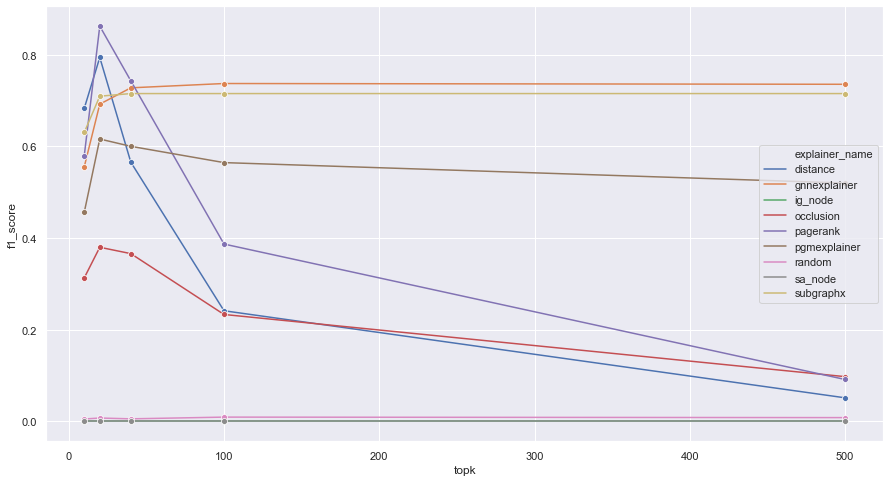

In [43]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(
    data=df[df.dataset=="syn3"],
    x="topk", y="f1_score", 
    hue="explainer_name", marker="o", ax=ax)


In [76]:
df_small = df[df['dataset'].isin(['syn1', 'syn5'])]
df_small

dataset  topk explainer_name  num_test_nodes  gpu  f1_score    recall  \
0      syn1    10       distance           100.0  1.0  0.827099  0.895000   
1      syn1    10   gnnexplainer           100.0  1.0  0.393343  0.440000   
2      syn1    10        ig_node           100.0  1.0  0.415758  0.381667   
3      syn1    10      occlusion           100.0  1.0  0.040000  0.053333   
4      syn1    10       pagerank           100.0  1.0  0.863636  0.791667   
..      ...   ...            ...             ...  ...       ...       ...   
175    syn5   500       pagerank           100.0  1.0  0.091600  1.000000   
176    syn5   500   pgmexplainer           100.0  1.0  0.658149  1.000000   
177    syn5   500         random           100.0  1.0  0.014618  0.290000   
178    syn5   500        sa_node           100.0  1.0  0.658149  1.000000   
179    syn5   500      subgraphx           100.0  1.0  0.618212  0.484167   

     precision       auc  fidelity_acc+  ...  fidelity_prob-  mask_sparsity  \
0     0.777849  0.838573           0.38  ...        0.226022       0.997567   
1     0.360433  0.650486           0.21  ...        0.415991       0.997567   
2     0.456667  0.690219           0.05  ...        0.435937       0.997567   
3     0.032000  0.512180           0.25  ...        0.447654       0.997567   
4     0.950000  0.895794           0.53  ...       -0.005111       0.997567   
..         ...       ...            ...  ...             ...            ...   
175   0.047998  0.999499           1.00  ...        0.000000       0.853372   
176   0.522223  0.999228           1.00  ...        0.000000       0.983378   
177   0.007498  0.504424           0.45  ...        0.868089       0.853372   
178   0.522223  0.999415           1.00  ...        0.000000       0.983378   
179   0.896031 -1.000000           1.00  ...        0.580751       0.996199   

     expl_edges    time  number_of_edges  mask_sparsity_init  \
0         10.00  0.0162           4110.0            0.009175   
1         10.00  5.4596           4110.0            0.937606   
2         10.00  0.1592           4110.0            0.050822   
3         10.00  0.5690           4110.0            0.000243   
4         10.00  0.0200           4110.0            0.000487   
..          ...     ...              ...                 ...   
175      500.00  0.0202           3410.0            0.000845   
176       56.68  6.4482           3410.0            0.983378   
177      500.00  0.0001           3410.0            0.000293   
178       56.68  0.0047           3410.0            0.983378   
179       12.96  4.0484           3410.0            0.996199   

     non_zero_values_init         type  1-fidelity_acc- 1-fidelity_prob-  
0                 4072.29     baseline             0.67         0.773978  
1                  256.44  pertubation             0.48         0.584009  
2                 3901.12     gradient             0.47         0.564063  
3                 4109.00  pertubation             0.51         0.552346  
4                 4108.00     baseline             0.95         1.005111  
..                    ...          ...              ...              ...  
175               3407.12     baseline             1.00         1.000000  
176                 56.68  pertubation             1.00         1.000000  
177               3409.00     baseline             0.00         0.131911  
178                 56.68     gradient             1.00         1.000000  
179                 12.96  pertubation             0.25         0.419249  

[90 rows x 22 columns]

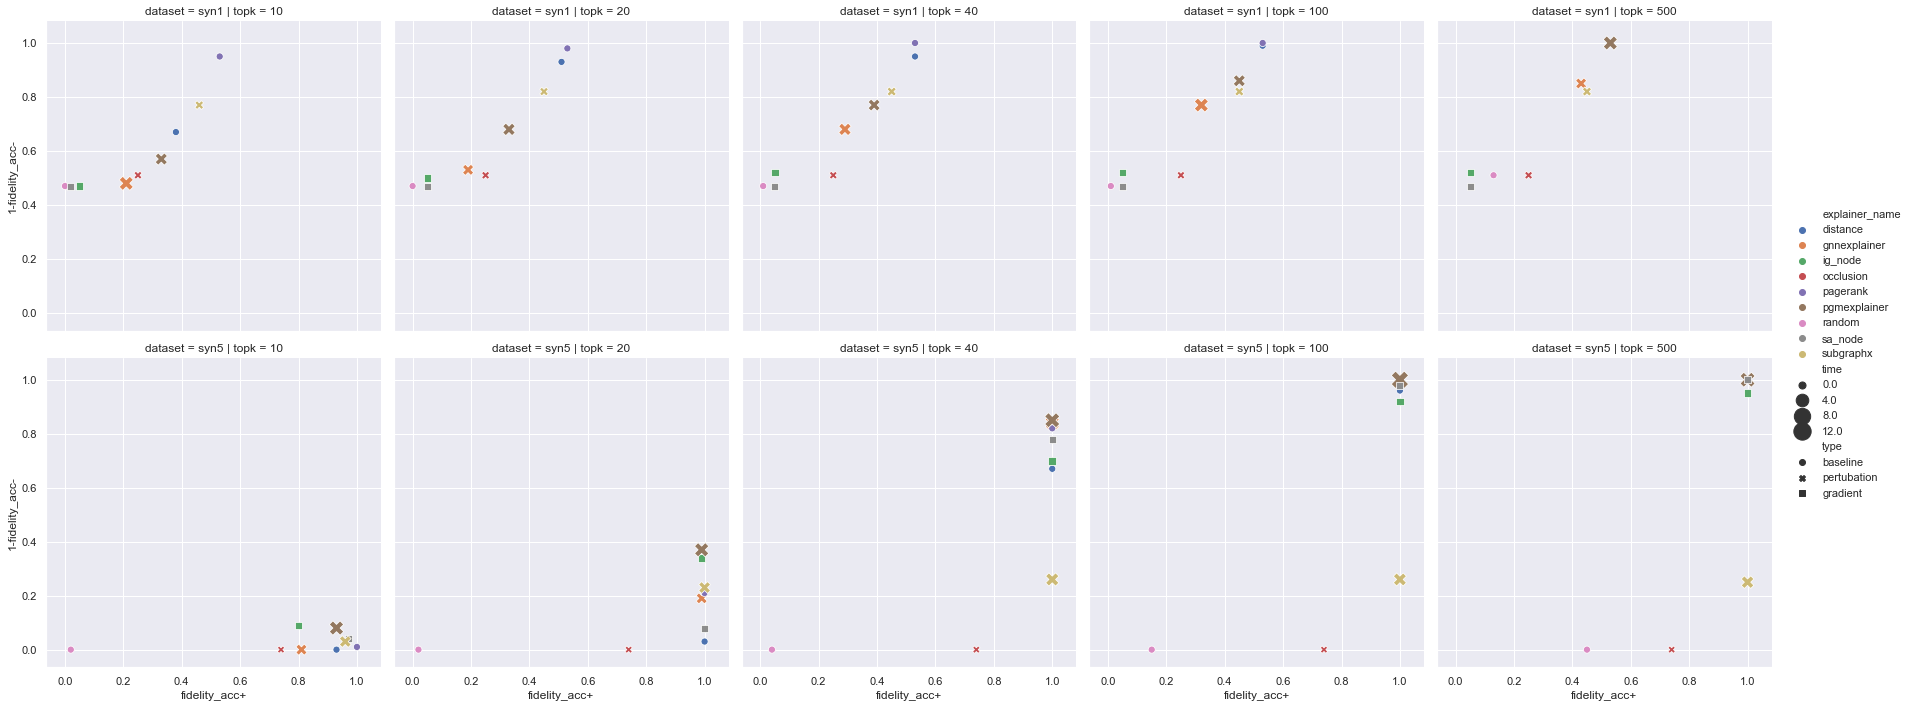

In [77]:
sns.set()

sns.relplot(
        data=df_small,
        x="fidelity_acc+", y="1-fidelity_acc-", col="topk", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type"
    )


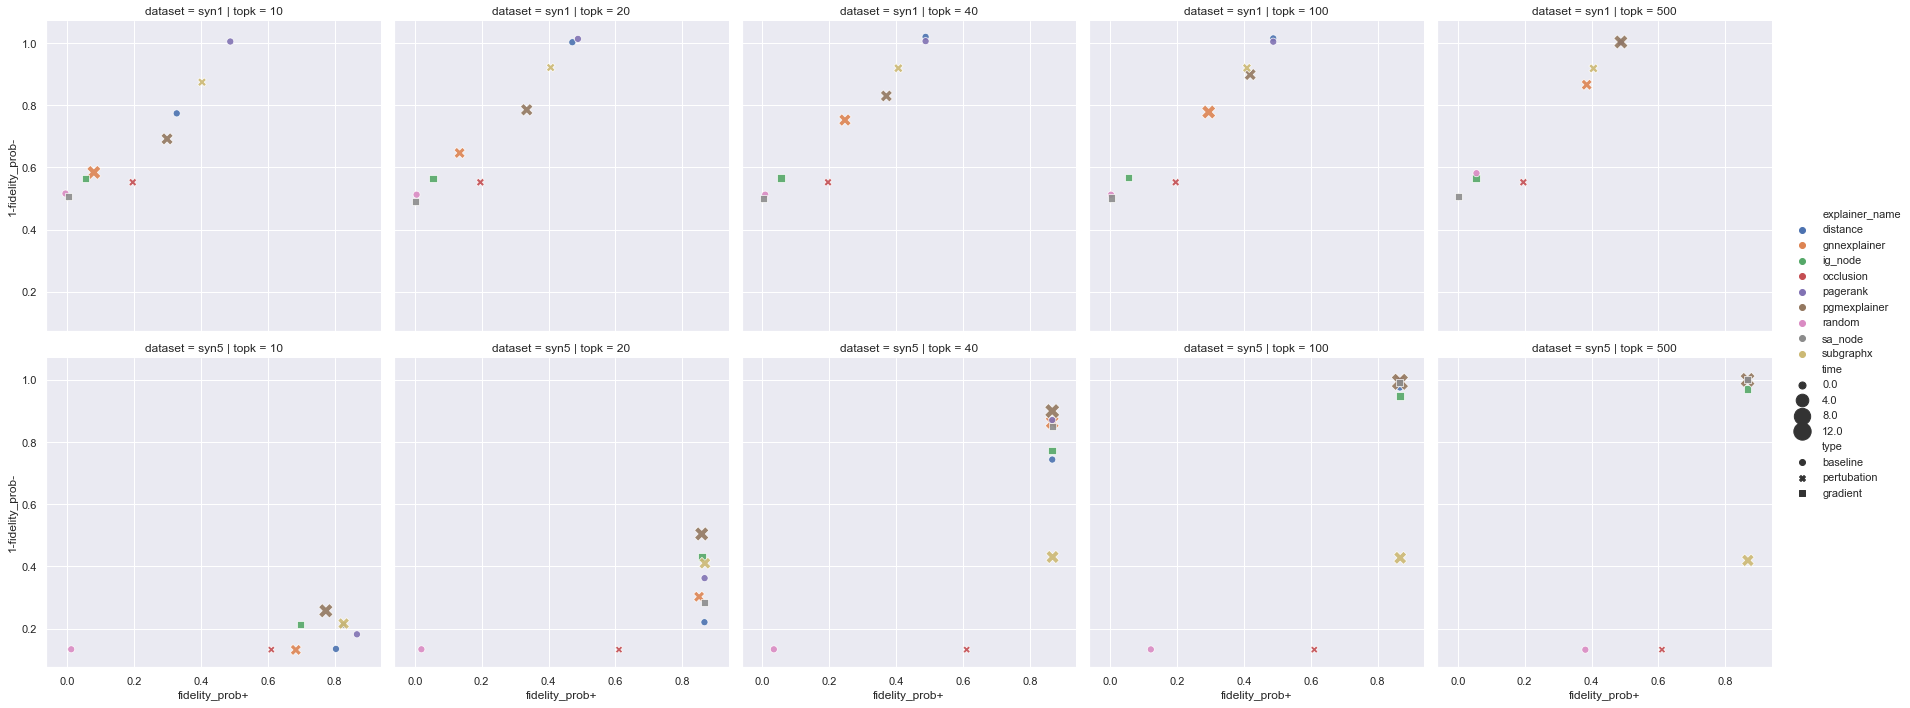

In [78]:
sns.relplot(
        data=df_small,
        x="fidelity_prob+", y="1-fidelity_prob-", col="topk", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .9
    )

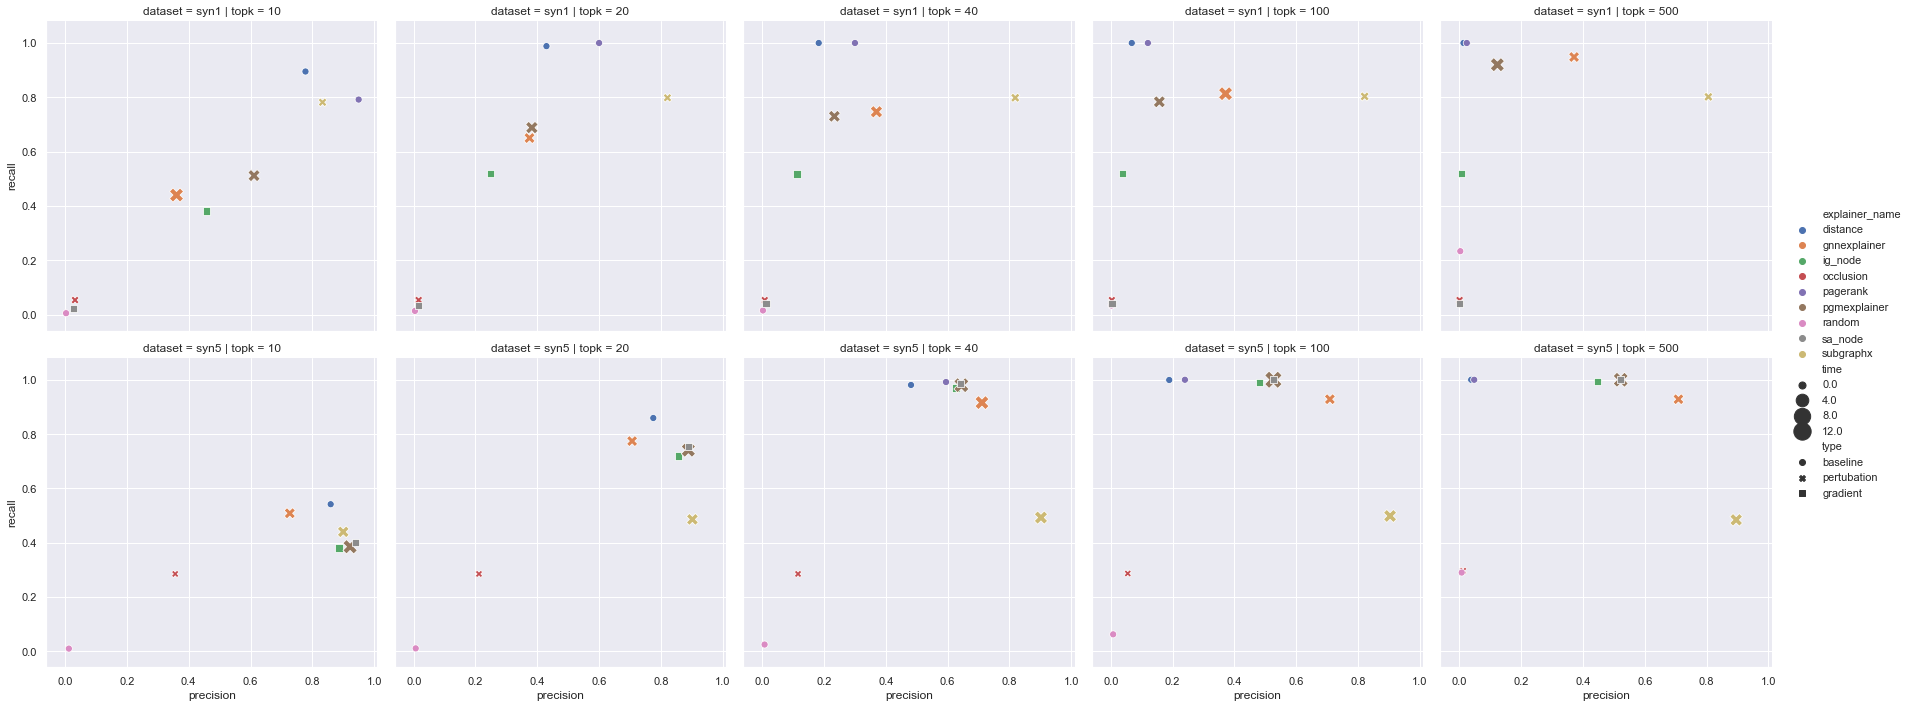

In [79]:
sns.relplot(
        data=df_small,
        x="precision", y="recall", col="topk", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type"
    )

# Accuracy Top

In [41]:
dir = '/cluster/home/kamara/Explain/csv/'

expe = "top_edges"


jsonpath = f'/cluster/home/kamara/Explain/config_{expe}.json'
ranges = get_param_ranges(jsonpath)

df = pd.read_csv(os.path.join(dir, f'{expe}.csv'), index_col = 0)
#res = df.groupby(by=['dataset', 'threshold', 'explainer_name']).mean()
#res.reset_index()
#df = df.reset_index()
#df = df[df.dataset=="syn1"]
res = df.groupby(by=['dataset', 'explainer_name']).mean()

In [42]:
def explainer_type(row):
    if row['explainer_name'] in ['gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa_node', 'ig_node'] :
      return('gradient')
    return('baseline')



df['type'] = df.apply(lambda row: explainer_type(row), axis=1)
df["1-fidelity_acc-"] = 1- df["fidelity_acc-"]
df["1-fidelity_prob-"] = 1- df["fidelity_prob-"]

In [43]:
df = df.reset_index()
df

dataset explainer_name  num_test_nodes  gpu  f1_score_top  recall_top  \
0     syn1       distance           200.0  1.0      0.698606    0.686667   
1     syn1   gnnexplainer           200.0  1.0      0.328182    0.320000   
2     syn1        ig_node           200.0  1.0      0.438333    0.438333   
3     syn1      occlusion           200.0  1.0      0.054167    0.054167   
4     syn1       pagerank           200.0  1.0      0.868333    0.868333   
5     syn1   pgmexplainer           200.0  1.0      0.568561    0.568333   
6     syn1         random           200.0  1.0      0.002500    0.002500   
7     syn1        sa_node           200.0  1.0      0.018788    0.018333   
8     syn1      subgraphx           200.0  1.0      0.680818    0.642500   
9     syn3       distance           200.0  1.0      0.722813    0.711250   
10    syn3   gnnexplainer           200.0  1.0      0.610890    0.582083   
11    syn3        ig_node           200.0  1.0      0.000000    0.000000   
12    syn3      occlusion           200.0  1.0      0.332303    0.320833   
13    syn3       pagerank           200.0  1.0      0.935674    0.933750   
14    syn3   pgmexplainer           200.0  1.0      0.644131    0.642917   
15    syn3         random           200.0  1.0      0.004583    0.004583   
16    syn3        sa_node           200.0  1.0      0.000000    0.000000   
17    syn3      subgraphx           200.0  1.0      0.568586    0.551667   
18    syn4       distance           200.0  1.0      0.626712    0.615000   
19    syn4   gnnexplainer           200.0  1.0      0.603697    0.588333   
20    syn4        ig_node           200.0  1.0      0.858530    0.855000   
21    syn4      occlusion           200.0  1.0      0.607121    0.605000   
22    syn4       pagerank           200.0  1.0      0.839167    0.839167   
23    syn4   pgmexplainer           200.0  1.0      0.934667    0.913333   
24    syn4         random           200.0  1.0      0.006667    0.006667   
25    syn4        sa_node           200.0  1.0      0.142727    0.140833   
26    syn4      subgraphx           200.0  1.0      0.570909    0.549167   
27    syn5       distance           200.0  1.0      0.674812    0.658333   
28    syn5   gnnexplainer           200.0  1.0      0.621695    0.595417   
29    syn5        ig_node           200.0  1.0      0.806736    0.797917   
30    syn5      occlusion           200.0  1.0      0.277803    0.276667   
31    syn5       pagerank           200.0  1.0      0.853287    0.851667   
32    syn5   pgmexplainer           200.0  1.0      0.831922    0.822500   
33    syn5         random           200.0  1.0      0.009583    0.009583   
34    syn5        sa_node           200.0  1.0      0.835983    0.832083   
35    syn5      subgraphx           200.0  1.0      0.486891    0.472917   
36    syn6       distance           200.0  1.0      0.724667    0.724000   
37    syn6   gnnexplainer           200.0  1.0      0.204222    0.204000   
38    syn6        ig_node           200.0  1.0      0.199222    0.198000   
39    syn6      occlusion           200.0  1.0      0.023000    0.023000   
40    syn6       pagerank           200.0  1.0      0.663556    0.599000   
41    syn6   pgmexplainer           200.0  1.0      0.381333    0.363000   
42    syn6         random           200.0  1.0      0.006000    0.006000   
43    syn6        sa_node           200.0  1.0      0.113222    0.109000   
44    syn6      subgraphx           200.0  1.0      0.679333    0.655000   

    precision_top  ged  auc_top  f1_score  ...  fidelity_prob-  mask_sparsity  \
0        0.713333 -1.0     -1.0  0.005823  ...        0.000000       0.010618   
1        0.338000 -1.0     -1.0  0.447901  ...        0.000000       0.926178   
2        0.438333 -1.0     -1.0  0.007163  ...        0.252697       0.040309   
3        0.054167 -1.0     -1.0  0.005822  ...       -0.096364       0.000243   
4        0.868333 -1.0     -1.0  0.005825  ...        0.000000       0.000487   
5        0.568833 -1

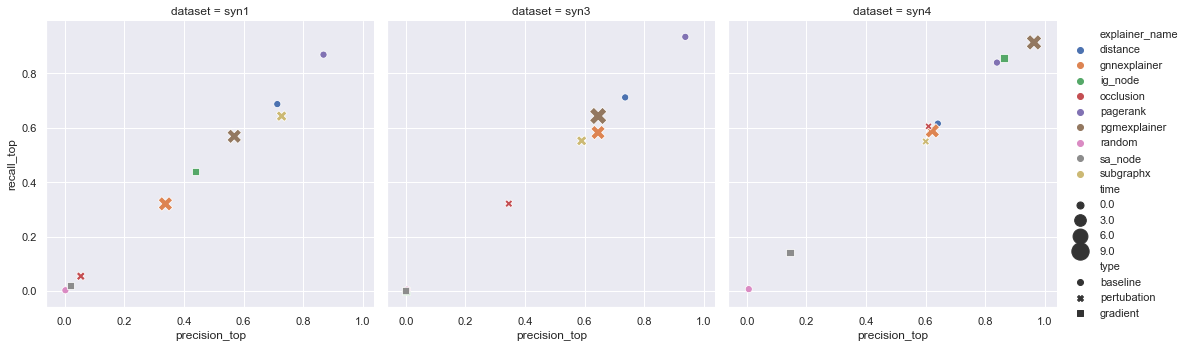

In [19]:
sns.relplot(
    data=df[df.dataset.isin(["syn1", "syn3", "syn4"])],
    x="precision_top", y="recall_top", col = 'dataset',
    hue="explainer_name", size="time", sizes=(50, 300), style="type"
)

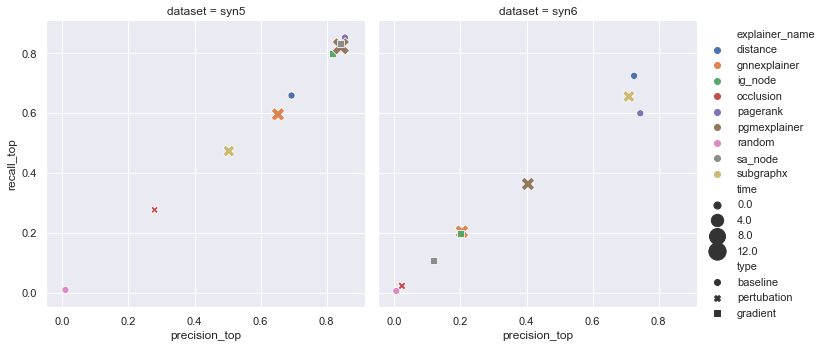

In [20]:
sns.relplot(
    data=df[df.dataset.isin(["syn5", "syn6"])],
    x="precision_top", y="recall_top", col = 'dataset',
    hue="explainer_name", size="time", sizes=(50, 300), style="type"
)

In [46]:
df_top = pd.pivot_table(df, values='f1_score_top', index=['explainer_name'], columns='dataset')
df_top['mean_acc_top'] = df_top.mean(axis=1)
df_top.sort_values(by=['mean_acc_top'])

dataset             syn1      syn3      syn4      syn5      syn6  mean_acc_top
explainer_name                                                                
random          0.002500  0.004583  0.006667  0.009583  0.006000      0.005867
sa_node         0.018788  0.000000  0.142727  0.835983  0.113222      0.222144
occlusion       0.054167  0.332303  0.607121  0.277803  0.023000      0.258879
ig_node         0.438333  0.000000  0.858530  0.806736  0.199222      0.460564
gnnexplainer    0.328182  0.610890  0.603697  0.621695  0.204222      0.473737
subgraphx       0.680818  0.568586  0.570909  0.486891  0.679333      0.597308
pgmexplainer    0.568561  0.644131  0.934667  0.831922  0.381333      0.672123
distance        0.698606  0.722813  0.626712  0.674812  0.724667      0.689522
pagerank        0.868333  0.935674  0.839167  0.853287  0.663556      0.832003